# plot the violin plot of local mean of SHAP value

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
with open("/scratch/hz1994/blocking/data_MMmodel/filepath.txt","r") as fi:
    for ln in fi:
        if ln.startswith("Reduced_dim_variables"):
            rd_path=ln.strip().split('\t')[1]
        if ln.startswith("TMindex_filepath"):
            TMindex_path=ln.strip().split('\t')[1]   
        if ln.startswith("dimensionalized_filepath"):
            dim_path=ln.strip().split('\t')[1]   
        if ln.startswith("nondimensionalized_filepath"):
            nondim_path=ln.strip().split('\t')[1]
        if ln.startswith("conditionedT_filepath" ):
            train_path=ln.strip().split('\t')[1]
        if ln.startswith("model_filepath" ):
            models_path=ln.strip().split('\t')[1]
        if ln.startswith("fig_filepath" ):
            fig_path=ln.strip().split('\t')[1]            
        if ln.startswith("DGindex_filepath"):
            DGindex_path=ln.strip().split('\t')[1]              
print(rd_path)
print(TMindex_path)
print(dim_path)
print(train_path)
print(models_path)
print(fig_path)
import matplotlib as mpl

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family' : 'sans-serif',
        'weight' : 'regular',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

random_seed=35
epoch=4
path="/scratch/hz1994/blocking/MMmodel/MMmodel/notebooks/shap_values_list_epoch_%d/"%epoch
pd1_ind=np.load(path+"shap_epoch_%d_seed_%d_TPind.npy"%(epoch,random_seed))
pd2_ind=np.load(path+"shap_epoch_%d_seed_%d_TFind.npy"%(epoch,random_seed))
shap_values_list=np.load(path+"shap_values_list_epoch_%d_seed_%d.npy"%(epoch,random_seed)) 
pd1=shap_values_list[pd1_ind, 1,0 ]

latitudes = np.load(dim_path+'dataX_lat.npy')
longitudes = np.load(dim_path+'dataX_lon.npy')  

lon_dict=dict(zip(longitudes,np.arange(longitudes.size),))
lat_dict=dict(zip(latitudes,np.arange(latitudes.size),))
sparse_data=np.zeros((pd1.shape[0],4,3))
sq=True
if sq:
    reg_list=["reg1_sq","reg2_sq","reg3_sq","reg4_sq"]
else:
    reg_list=["reg1","reg2","reg3","reg4"]


/ext3/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/scratch/hz1994/blocking/data_MMmodel/reduceddim/
/scratch/hz1994/blocking/data_MMmodel/TMindex/
/scratch/hz1994/blocking/data_MMmodel/dim/
/scratch/hz1994/blocking/data_MMmodel/conditionT/
/scratch/hz1994/blocking/data_MMmodel/CNNmodels/
/scratch/hz1994/blocking/data_MMmodel/fig_MMmodel/


In [2]:
for i,name in enumerate(reg_list):
    reg=np.load(path+name+".npy")
    ind=(reg*0).astype(int)
    for j in range(ind.shape[0]):
        ind[j,0]=lat_dict[reg[j,0]]
        ind[j,1]=lon_dict[reg[j,1]]
    sparse_data[:,i,:]=pd1[:,ind[:,0],ind[:,1],:].mean(axis=1)

print("sparse_data.shape",sparse_data.shape)

sparse_data.shape (3341, 4, 3)


[0.03932044 0.024077   0.02178079 0.0375316  0.01441675 0.02847536
 0.03477136 0.01921845 0.02090028 0.02841465 0.02571449 0.01463424]
0 0.03910962471349798
1 0.020282866558035666
2 0.014092050069272189
3 0.037091523875554255
4 0.014599050618105751
5 0.021417019624268722
6 0.03937860403087674
7 0.014388520040543697
8 0.006241566934785663
9 0.02745079616157777
10 0.026256277993325246
11 0.01312221463519731


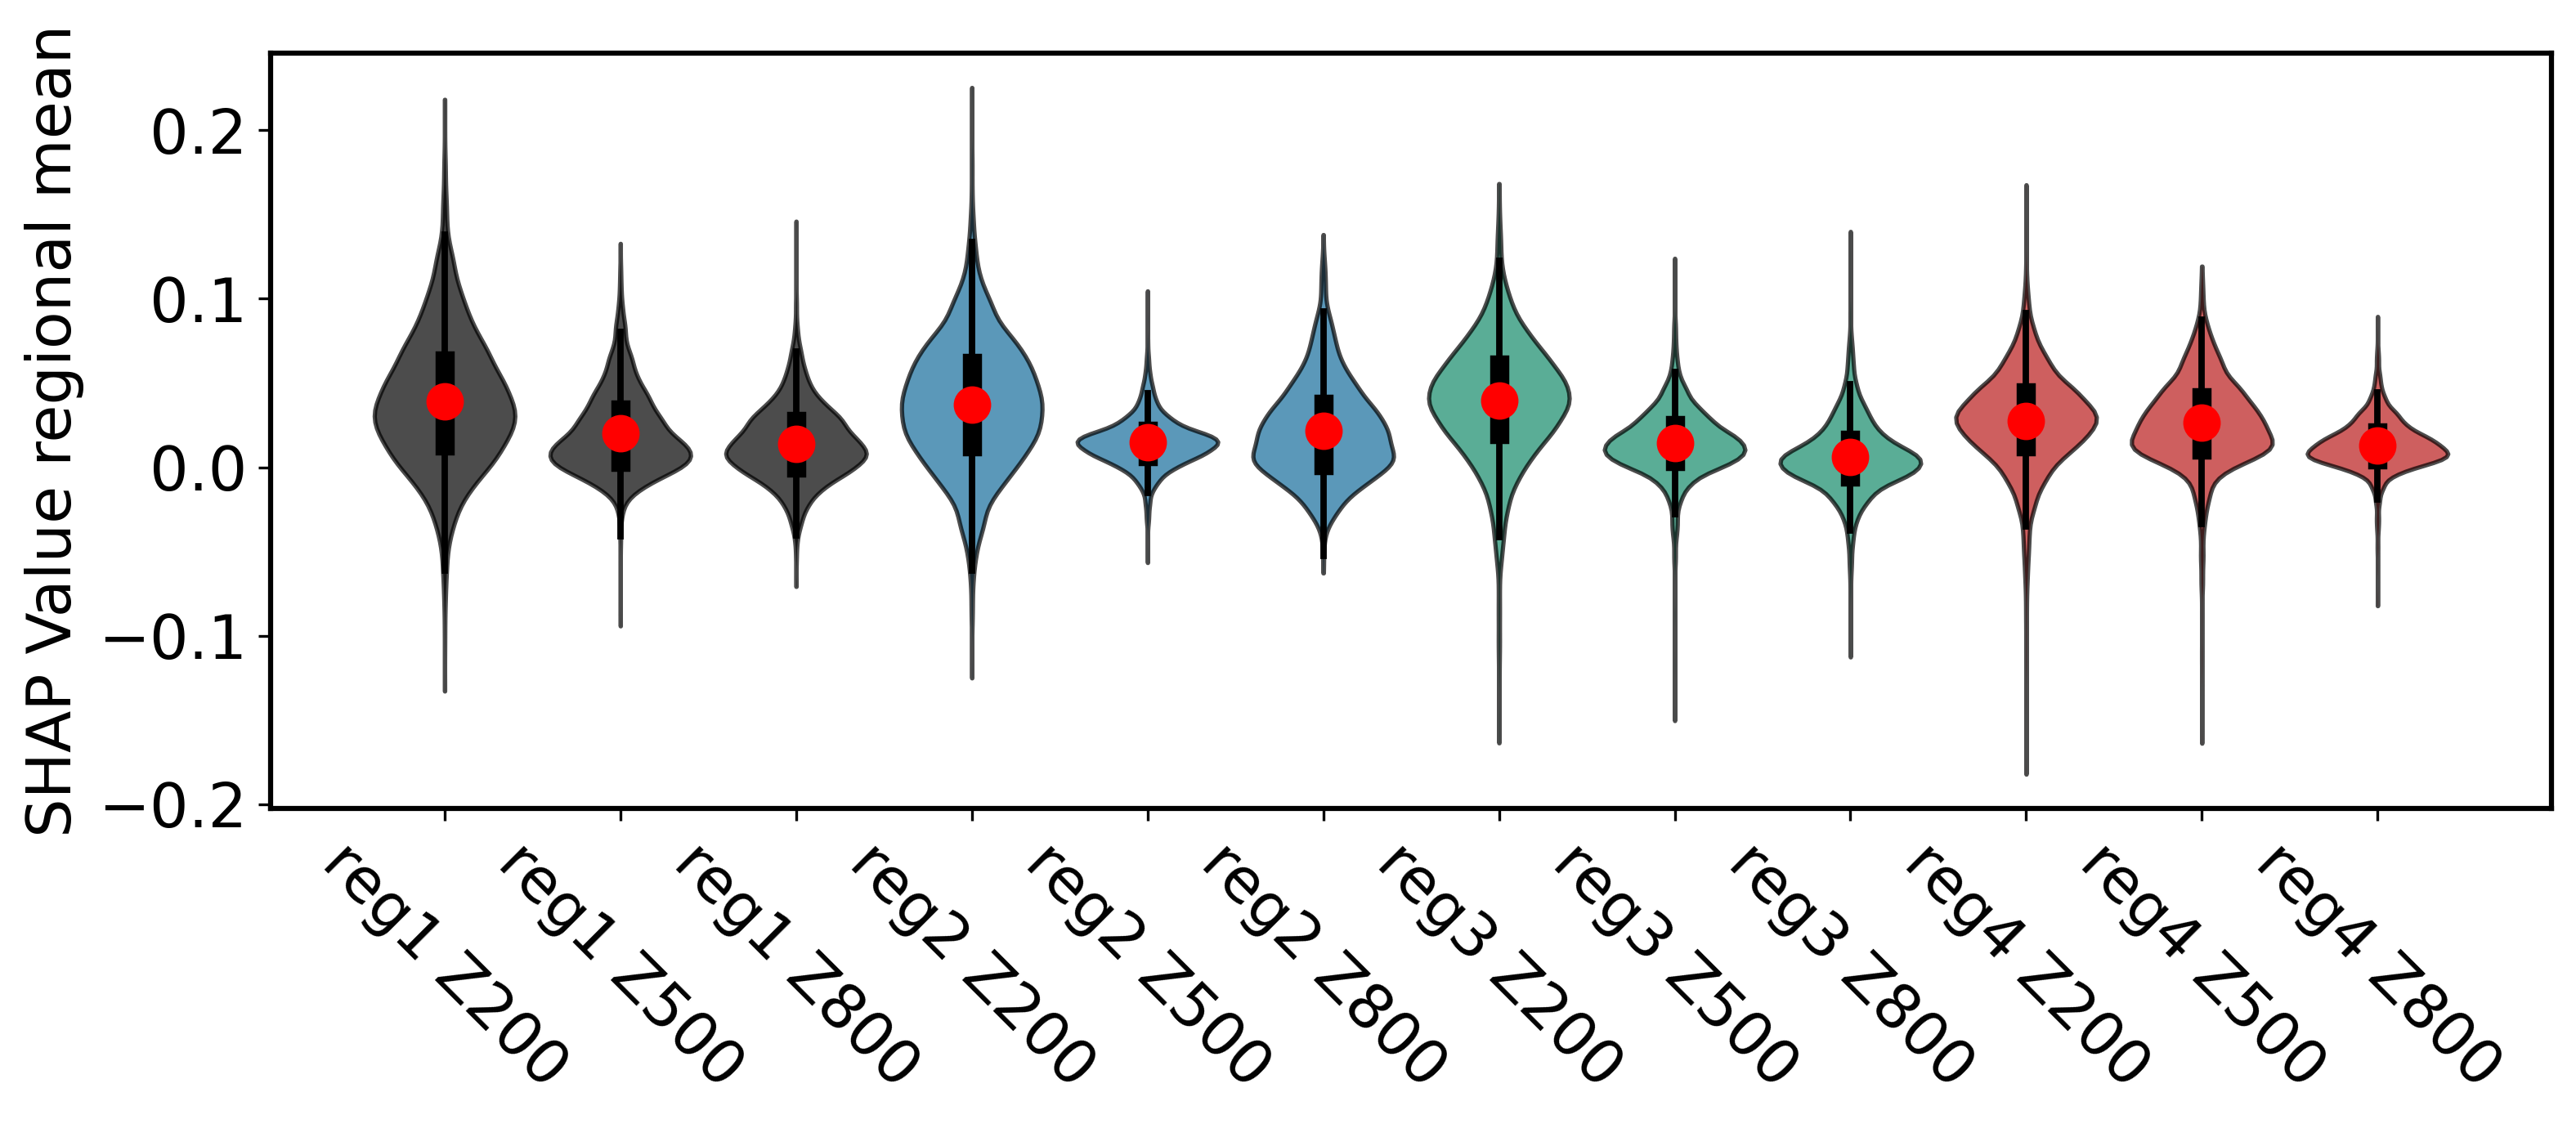

In [5]:
data=np.zeros((sparse_data.shape[0],sparse_data.shape[1]*sparse_data.shape[2]) )

k=0
for i in range (sparse_data.shape[1]):
    for j in range(sparse_data.shape[2]):
        data[:,k]=sparse_data[:,i,j]
        k=k+1

print(data.std(axis=0))
df = pd.DataFrame(data, columns=["reg1 Z200", "reg1 Z500", "reg1 Z800", 
           "reg2 Z200", "reg2 Z500", "reg2 Z800", 
           "reg3 Z200", "reg3 Z500", "reg3 Z800", 
           "reg4 Z200", "reg4 Z500", "reg4 Z800", ])

# Create the violin plot

color=["#000000", "#0072B2", "#009E73", "#D50000"] 
palette = [color[0], color[0], color[0], 
           color[1], color[1], color[1], 
           color[2], color[2], color[2], 
           color[3], color[3], color[3]]

fig,ax=plt.subplots(figsize=(12, 4))
sns.violinplot(data=df,palette=palette,alpha=0.7,cut=0)

mean_values=data.mean(axis=0)
for i, mean in enumerate(mean_values):
    print(i,mean)
    plt.scatter(i, mean, color='red', s=100, zorder=3, label='Mean' if i == 0 else "")

# Customize the plot 
plt.xlabel('Group')
plt.ylabel('SHAP Value regional mean')

# Show the plot 
plt.xticks(rotation=-45)
plt.xlabel("")
plt.show()
fig.savefig("app_fig_1_violin_plot.png",dpi=200 , bbox_inches = "tight")


